In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats
import statsmodels.api as sm
import os

In [3]:
os.getcwd()

'C:\\Users\\user1\\Desktop\\창원_빅데이터_공모전\\Code_EDA'

In [4]:
Changwon_Call_df2 = pd.read_csv('C:\\Users\\user1\\Desktop\\창원_빅데이터_공모전\\Preprocessed_data\\Changwon_Call_df_ver2.csv')
del Changwon_Call_df2['Unnamed: 0']
Changwon_Call_df2.head()

,일자(YYYYMMDD),연령,성별,발신지(시도),발신지(시군구),대분류,중분류,통화비율(시군구내),요일,주말/주중,휴일
0,2019-08-01,40,남성,경남,창원시 마산합포구,생활편의,생활서비스,0.0002,목요일,0,0
1,2019-08-01,50,남성,경남,창원시 마산합포구,생활편의,생활편의,0.0003,목요일,0,0
2,2019-08-01,60,남성,경남,창원시 마산합포구,금융편의,제2금융,0.0003,목요일,0,0
3,2019-08-01,40,남성,경남,창원시 마산합포구,서비스산업,수리/AS,0.0001,목요일,0,0
4,2019-08-01,60,남성,경남,창원시 마산합포구,의료편의,의료시설,0.0002,목요일,0,0


In [5]:
#연령의 데이터 타입을 int -> str
Changwon_Call_df2['연령'] = Changwon_Call_df2['연령'].astype('str')

In [6]:
# 연령대 변수를 추가 생성
Changwon_Call_df2['연령대']=Changwon_Call_df2['연령']+'대'

In [7]:
Changwon_Call_df2.dtypes

일자(YYYYMMDD)     object
연령               object
성별               object
발신지(시도)          object
발신지(시군구)         object
대분류              object
중분류              object
통화비율(시군구내)      float64
요일               object
주말/주중             int64
휴일                int64
연령대              object
dtype: object

In [8]:
len(Changwon_Call_df2['대분류'].unique())

14

In [9]:
Changwon_Call_df2

,일자(YYYYMMDD),연령,성별,발신지(시도),발신지(시군구),대분류,중분류,통화비율(시군구내),요일,주말/주중,휴일,연령대
0,2019-08-01,40,남성,경남,창원시 마산합포구,생활편의,생활서비스,0.0002,목요일,0,0,40대
1,2019-08-01,50,남성,경남,창원시 마산합포구,생활편의,생활편의,0.0003,목요일,0,0,50대
2,2019-08-01,60,남성,경남,창원시 마산합포구,금융편의,제2금융,0.0003,목요일,0,0,60대
3,2019-08-01,40,남성,경남,창원시 마산합포구,서비스산업,수리/AS,0.0001,목요일,0,0,40대
4,2019-08-01,60,남성,경남,창원시 마산합포구,의료편의,의료시설,0.0002,목요일,0,0,60대
5,2019-08-01,40,여성,경남,창원시 마산합포구,금융편의,제2금융,0.0007,목요일,0,0,40대
6,2019-08-01,60,여성,경남,창원시 마산합포구,의료편의,의료시설,0.0002,목요일,0,0,60대
7,2019-08-01,40,남성,경남,창원시 마산합포구,음식점,치킨,0.0001,목요일,0,0,40대
8,2019-08-01,40,남성,경남,창원시 마산합포구,금융편의,제2금융,0.0005,목요일,0,0,40대
9,2019-08-01,30,여성,경남,창원시 마산합포구,금융편의,제2금융,0.0004,목요일,0,0,30대


In [10]:
# 카이제곱 검정으로 독립성, 동질성, 적합도 검정 실시 
chi_squared_pvot = Changwon_Call_df2.pivot_table(values='연령',index='요일',columns='연령대',aggfunc='count',fill_value=0)
chi_squared_pvot

연령대,20대,30대,40대,50대,60대,70대
요일,,,,,,
금요일,781,2354,3469,2980,1916,439
목요일,589,2111,3115,2758,1785,354
수요일,644,2153,3208,2772,1801,382
월요일,785,2343,3575,3120,2013,628
일요일,165,706,1320,1190,583,28
토요일,216,1093,2148,1987,1010,62
화요일,677,2207,3268,2854,1866,420


In [11]:
# 연령에 대하여 요일의 통화건수에 대해 차이가 나는지 카이제곱 검정 
chi, pval, dof, expected = stats.chi2_contingency(chi_squared_pvot.T)
print('chi_square test')
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree of freedom :{}'.format(dof))
print('expected value :\n{}'.format(expected.round(3)))

chi_square test
chisq:590.267
p:0.000
degree of freedom :30
expected value :
[[ 678.434  608.71   622.803  708.267  226.846  370.272  641.668]
 [2280.855 2046.446 2093.824 2381.152  762.641 1244.832 2157.25 ]
 [3536.055 3172.646 3246.098 3691.548 1182.338 1929.888 3344.428]
 [3106.515 2787.251 2851.78  3243.119 1038.714 1695.456 2938.166]
 [1930.292 1731.911 1772.008 2015.174  645.425 1053.504 1825.686]
 [ 406.849  365.037  373.488  424.74   136.037  222.048  384.801]]


In [12]:
# 카이제곱 검정으로 독립성, 동질성, 적합도 검정 실시 
chi_squared_pvot_2 = Changwon_Call_df2.pivot_table(values='연령',index='대분류',columns='연령대',aggfunc='count',fill_value=0)
chi_squared_pvot_2

연령대,20대,30대,40대,50대,60대,70대
대분류,,,,,,
건물/시설,0,0,8,10,0,0
공공편의,186,625,1080,1004,560,41
교육/학문,2,510,578,8,0,0
교통편의,133,976,1959,2195,1567,202
금융편의,1735,2446,3013,3012,2606,1149
기업/단체,0,8,29,26,0,0
생활편의,133,1219,1715,2540,1542,327
서비스산업,65,1240,2517,2342,1083,7
쇼핑,72,1109,2444,1855,1046,136


In [13]:
# 연령에 따른 대분류의 통화건수에 대해 차이가 나는지 카이제곱 검정 
chi, pval, dof, expected = stats.chi2_contingency(chi_squared_pvot_2.T)
print('chi_square test')
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree of freedom :{}'.format(dof))
# print('expected value :\n{}'.format(expected.round(3)))

chi_square test
chisq:9433.531
p:0.000
degree of freedom :65


In [14]:
#일자 데이터 타입을 datetime으로 변경 
Changwon_Call_df2['일자(YYYYMMDD)'] = Changwon_Call_df2['일자(YYYYMMDD)'].astype('str')
Changwon_Call_df2['일자(YYYYMMDD)'] = pd.to_datetime(Changwon_Call_df2['일자(YYYYMMDD)'])

# 주말/주중, 휴일 또한 데이터 타입을 int -> str 
Changwon_Call_df2['주말/주중'] = Changwon_Call_df2['주말/주중'].astype('str')
Changwon_Call_df2['휴일'] = Changwon_Call_df2['휴일'].astype('str')

Changwon_Call_df2.dtypes

일자(YYYYMMDD)    datetime64[ns]
연령                      object
성별                      object
발신지(시도)                 object
발신지(시군구)                object
대분류                     object
중분류                     object
통화비율(시군구내)             float64
요일                      object
주말/주중                   object
휴일                      object
연령대                     object
dtype: object

In [15]:
Changwon_Call_df2.head()

,일자(YYYYMMDD),연령,성별,발신지(시도),발신지(시군구),대분류,중분류,통화비율(시군구내),요일,주말/주중,휴일,연령대
0,2019-08-01,40,남성,경남,창원시 마산합포구,생활편의,생활서비스,0.0002,목요일,0,0,40대
1,2019-08-01,50,남성,경남,창원시 마산합포구,생활편의,생활편의,0.0003,목요일,0,0,50대
2,2019-08-01,60,남성,경남,창원시 마산합포구,금융편의,제2금융,0.0003,목요일,0,0,60대
3,2019-08-01,40,남성,경남,창원시 마산합포구,서비스산업,수리/AS,0.0001,목요일,0,0,40대
4,2019-08-01,60,남성,경남,창원시 마산합포구,의료편의,의료시설,0.0002,목요일,0,0,60대


In [16]:
plt.rcParams['font.family'] = 'Malgun Gothic'

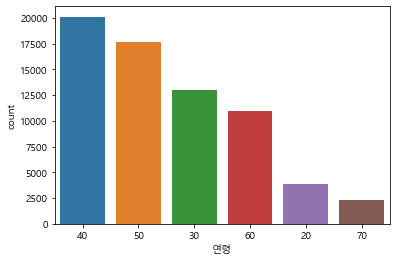

In [17]:
descending_order = Changwon_Call_df2['연령'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(6,4))
plt.xticks(rotation = 0)
sns.countplot(x='연령',data=Changwon_Call_df2,order=descending_order)

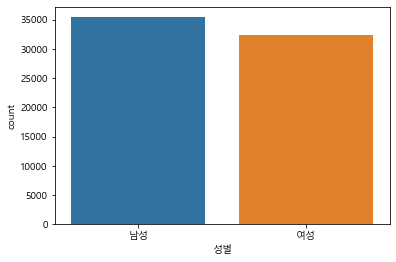

In [18]:
plt.figure(figsize=(6,4))
plt.xticks(rotation = 0)
sns.countplot(x='성별',data=Changwon_Call_df2)

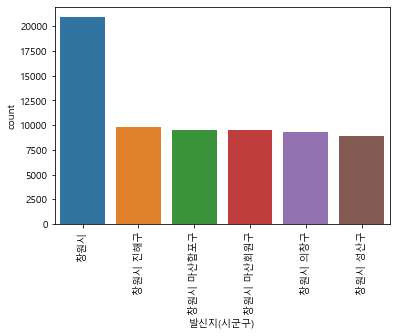

In [19]:
descending_order = Changwon_Call_df2['발신지(시군구)'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(6,4))
plt.xticks(rotation = 90)
sns.countplot(x='발신지(시군구)',data=Changwon_Call_df2,order=descending_order)

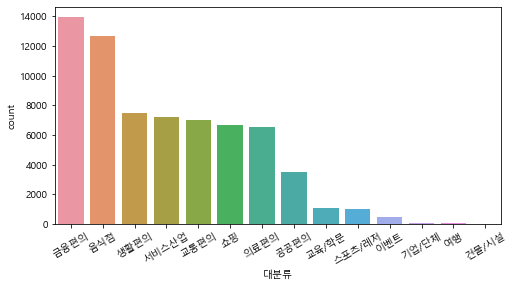

In [20]:
descending_order = Changwon_Call_df2['대분류'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(8,4))
plt.xticks(rotation = 30)
sns.countplot(x='대분류',data=Changwon_Call_df2,order=descending_order)

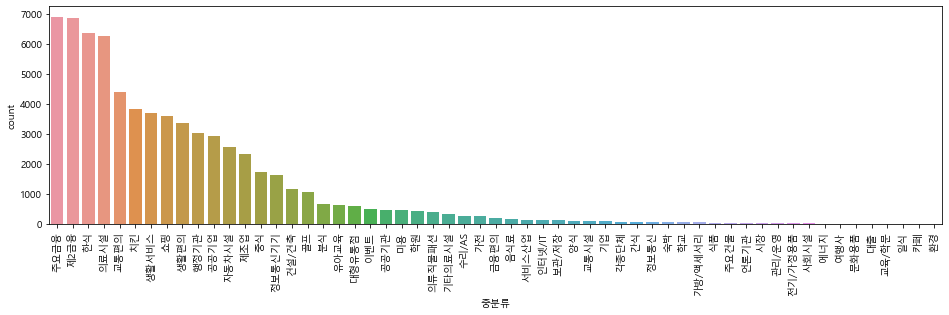

In [21]:
descending_order = Changwon_Call_df2['중분류'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(16,4))
plt.xticks(rotation = 90)
sns.countplot(x='중분류',data=Changwon_Call_df2,order=descending_order)

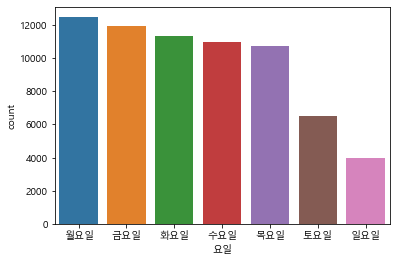

In [22]:
descending_order = Changwon_Call_df2['요일'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(6,4))
plt.xticks(rotation = 0)
sns.countplot(x='요일',data=Changwon_Call_df2,order=descending_order)

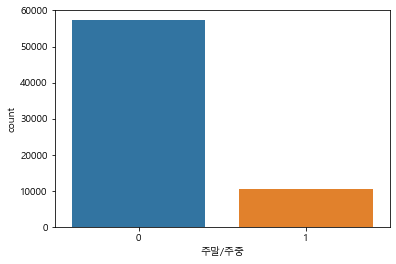

In [23]:
descending_order = Changwon_Call_df2['주말/주중'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(6,4))
plt.xticks(rotation = 0)
sns.countplot(x='주말/주중',data=Changwon_Call_df2,order=descending_order)

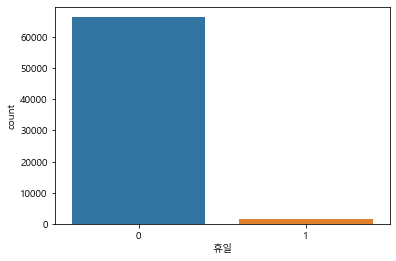

In [24]:
descending_order = Changwon_Call_df2['휴일'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(6,4))
plt.xticks(rotation = 0)
sns.countplot(x='휴일',data=Changwon_Call_df2,order=descending_order)

In [25]:
Changwon_Call_df2.head()

,일자(YYYYMMDD),연령,성별,발신지(시도),발신지(시군구),대분류,중분류,통화비율(시군구내),요일,주말/주중,휴일,연령대
0,2019-08-01,40,남성,경남,창원시 마산합포구,생활편의,생활서비스,0.0002,목요일,0,0,40대
1,2019-08-01,50,남성,경남,창원시 마산합포구,생활편의,생활편의,0.0003,목요일,0,0,50대
2,2019-08-01,60,남성,경남,창원시 마산합포구,금융편의,제2금융,0.0003,목요일,0,0,60대
3,2019-08-01,40,남성,경남,창원시 마산합포구,서비스산업,수리/AS,0.0001,목요일,0,0,40대
4,2019-08-01,60,남성,경남,창원시 마산합포구,의료편의,의료시설,0.0002,목요일,0,0,60대


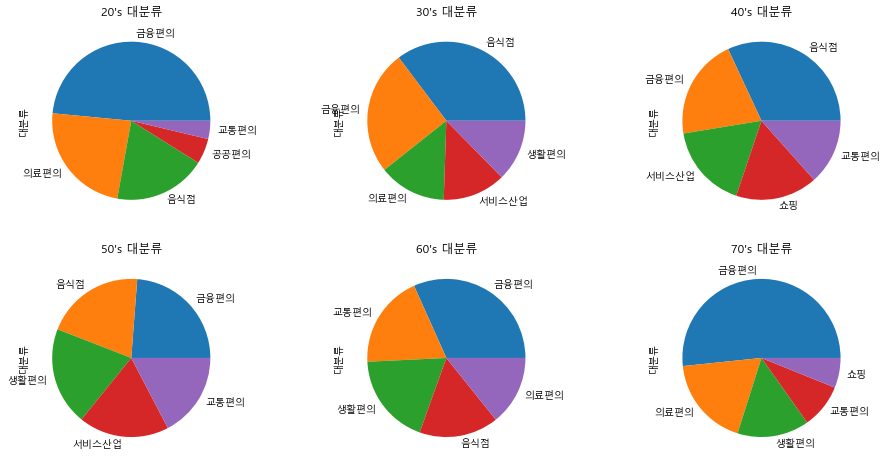

In [26]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(2,3,1)
plt.title("20's 대분류")
ax2 = fig.add_subplot(2,3,2)
plt.title("30's 대분류")
ax3 = fig.add_subplot(2,3,3)
plt.title("40's 대분류")
ax4 = fig.add_subplot(2,3,4)
plt.title("50's 대분류")
ax5 = fig.add_subplot(2,3,5)
plt.title("60's 대분류")
ax6 = fig.add_subplot(2,3,6)
plt.title("70's 대분류")

Changwon_Call_df2[Changwon_Call_df2['연령']=='20']['대분류'].value_counts().head(5).plot.pie(ax=ax1)
Changwon_Call_df2[Changwon_Call_df2['연령']=='30']['대분류'].value_counts().head(5).plot.pie(ax=ax2)
Changwon_Call_df2[Changwon_Call_df2['연령']=='40']['대분류'].value_counts().head(5).plot.pie(ax=ax3)
Changwon_Call_df2[Changwon_Call_df2['연령']=='50']['대분류'].value_counts().head(5).plot.pie(ax=ax4)
Changwon_Call_df2[Changwon_Call_df2['연령']=='60']['대분류'].value_counts().head(5).plot.pie(ax=ax5)
Changwon_Call_df2[Changwon_Call_df2['연령']=='70']['대분류'].value_counts().head(5).plot.pie(ax=ax6)

plt.show()

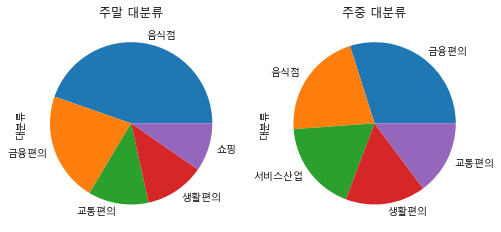

In [27]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,2,1)
plt.title("주말 대분류")
ax2 = fig.add_subplot(1,2,2)
plt.title("주중 대분류")

Changwon_Call_df2[Changwon_Call_df2['주말/주중']=='1']['대분류'].value_counts().head(5).plot.pie(ax=ax1)
Changwon_Call_df2[Changwon_Call_df2['주말/주중']=='0']['대분류'].value_counts().head(5).plot.pie(ax=ax2)

plt.show()

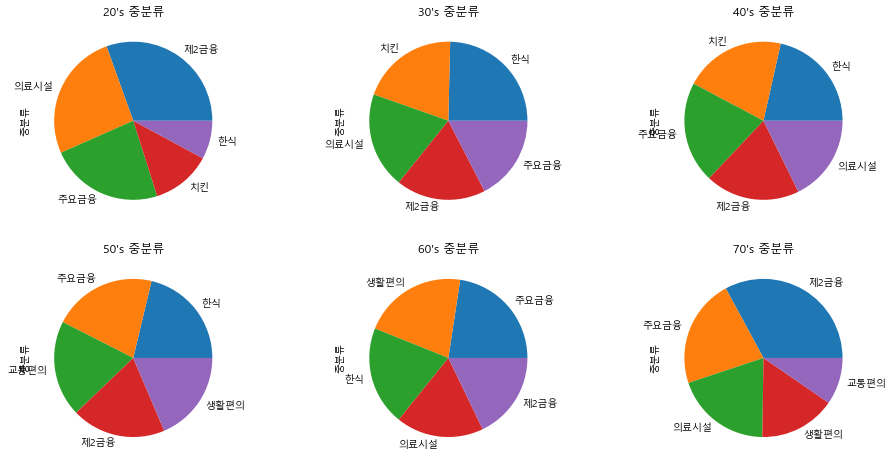

In [28]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(2,3,1)
plt.title("20's 중분류")
ax2 = fig.add_subplot(2,3,2)
plt.title("30's 중분류")
ax3 = fig.add_subplot(2,3,3)
plt.title("40's 중분류")
ax4 = fig.add_subplot(2,3,4)
plt.title("50's 중분류")
ax5 = fig.add_subplot(2,3,5)
plt.title("60's 중분류")
ax6 = fig.add_subplot(2,3,6)
plt.title("70's 중분류")

Changwon_Call_df2[Changwon_Call_df2['연령']=='20']['중분류'].value_counts().head(5).plot.pie(ax=ax1)
Changwon_Call_df2[Changwon_Call_df2['연령']=='30']['중분류'].value_counts().head(5).plot.pie(ax=ax2)
Changwon_Call_df2[Changwon_Call_df2['연령']=='40']['중분류'].value_counts().head(5).plot.pie(ax=ax3)
Changwon_Call_df2[Changwon_Call_df2['연령']=='50']['중분류'].value_counts().head(5).plot.pie(ax=ax4)
Changwon_Call_df2[Changwon_Call_df2['연령']=='60']['중분류'].value_counts().head(5).plot.pie(ax=ax5)
Changwon_Call_df2[Changwon_Call_df2['연령']=='70']['중분류'].value_counts().head(5).plot.pie(ax=ax6)

plt.show()

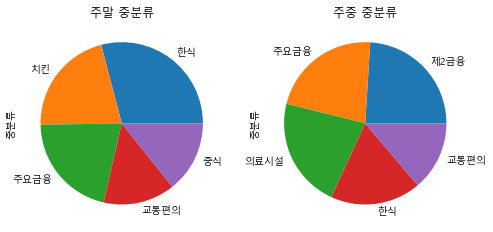

In [30]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,2,1)
plt.title("주말 중분류")
ax2 = fig.add_subplot(1,2,2)
plt.title("주중 중분류")

Changwon_Call_df2[Changwon_Call_df2['주말/주중']=='1']['중분류'].value_counts().head(5).plot.pie(ax=ax1)
Changwon_Call_df2[Changwon_Call_df2['주말/주중']=='0']['중분류'].value_counts().head(5).plot.pie(ax=ax2)

plt.show()